# Creating a static, nonlinear agent

Quick examples of how to create a static, nonlinear agent using the framework included in this package.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import create_agent, create_environment

mpl.style.use("seaborn-deep")

In [2]:
# Environment parameters
env_params = {
    "beta_0_star" : 1,    # Linear parameter intercept
    "beta_1_star" : 1,    # Linear parameter slope
    "y_star_std"  : 1e-5  # Standard deviation of sensory data
}

# Initialize environment and agent
env = create_environment(name="static_nonlinear", params=env_params)

# Generate data
x_range = np.linspace(start=-2.5, stop=2.5, num=500)
x_star = np.sqrt(2)
y = env.generate(x_star)

In [3]:
# Agent parameters
agent_params = {
    "beta_0" : 1,    # Linear parameter intercept
    "beta_1" : 1,    # Linear parameter slope
    "std_y"  : 0.5,  # Likelihood standard deviation
    "m_x"   : 2,    # Prior mean
    "s_x"  : 0.5,  # Prior standard deviation
    "x_range": np.linspace(start=-2.5, stop=2.5, num=500)
}

agent = create_agent(name="exact_nonlinear", params=agent_params)

# Perform inference
agent.infer_state(y)

# Collect distributions for plotting
prior = agent.prior
likelihood = agent.likelihood
posterior = agent.posterior

<Figure size 432x288 with 0 Axes>

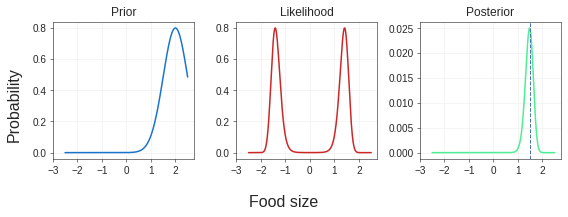

In [5]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, axes = plt.subplots(1,3, facecolor=(1,1,1), figsize=(8,3))

# Main plot
axes[0].plot(x_range, prior, c="#1874cd")        # Prior
axes[1].plot(x_range, likelihood, c="#cd2626")   # Likelihood
axes[2].plot(x_range, posterior, c="#4eee94")    # Posterior

# Posterior mode and posterior axis
axes[2].axvline(x=x_range[np.argmax(posterior)], ls="dashed", lw=1)

# Titles
axes[0].set_title("Prior")
axes[1].set_title("Likelihood")
axes[2].set_title("Posterior")

# Axis global labels
fig.supxlabel("Food size", fontsize=16)
fig.supylabel("Probability", fontsize=16)

# Cosmetic changes and axes ranges
for ax in axes:
    ax.xaxis.set_ticks(np.arange(-3, 3, 1))
    ax.axes.grid(which="major", axis="both", c="#f2f2f2")
    plt.setp(ax.spines.values(), color="black", linewidth=0.5)
    ax.tick_params(
        axis='both',          
        which='major',      
        bottom=True,
        left=True,
        color="black",
        width=0.5,
        length=3)
    
fig.tight_layout()